Download Iris dataset

In [107]:
from sklearn import datasets

iris = datasets.load_iris()

print("Number of objects in the dataset: " + str(iris.data.shape[0]))

print("Number of classes: " + str(len(iris.target_names)))
print("Names of classes: " + ", ".join(iris.target_names))

print("Number of features: " + str(len(iris.feature_names)))
print("Names of features: " + ", ".join(iris.feature_names))

Number of objects in the dataset: 150
Number of classes: 3
Names of classes: setosa, versicolor, virginica
Number of features: 4
Names of features: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)


Split dataset: 70 / 30 - train / test

In [108]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size = 0.7)

Use 3 neighbors classifier.

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(x_train, y_train)

y_pred = neigh.predict(x_test)
print("Confusion matrix:\n" + str(confusion_matrix(y_test, y_pred)))

average_types = 'macro', 'micro'
for avg_type in average_types:
    print('Recall with {0} average: '.format(avg_type) + str(recall_score(y_test, y_pred, average = avg_type)))
    print('F1-score with {0} average: '.format(avg_type) + str(f1_score(y_test, y_pred, average = avg_type)))
    print('Precision with {0} average: '.format(avg_type) + str(precision_score(y_test, y_pred, average = avg_type)))
    print()

print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

Confusion matrix:
[[14  0  0]
 [ 0 17  2]
 [ 0  0 12]]
Recall with macro average: 0.9649122807017544
F1-score with macro average: 0.9558404558404558
Precision with macro average: 0.9523809523809524

Recall with micro average: 0.9555555555555556
F1-score with micro average: 0.9555555555555556
Precision with micro average: 0.9555555555555556

Accuracy: 0.9555555555555556


Choose one class, solve binary classification problem

In [110]:
iris_binary = datasets.load_iris()
iris_binary.target_names = 'yes', 'no'
iris_binary.target = [1 if i < 100 else 0 for i in range(150)]

In [111]:
x_train_binary, x_test_binary, y_train_binary, y_test_binary = train_test_split(iris_binary.data, iris_binary.target, train_size = 0.7)

In [112]:
neigh_binary = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
neigh_binary.fit(x_train_binary, y_train_binary)

y_pred_bi = neigh_binary.predict(x_test_binary)

print("Confusion matrix:\n" + str(confusion_matrix(y_test_binary, y_pred_bi)))

Confusion matrix:
[[16  0]
 [ 1 28]]


In [113]:
average_types = 'macro', 'micro'
for avg_type in average_types:
    print('Recall with {0} average: '.format(avg_type) + str(recall_score(y_test_binary, y_pred_bi, average = avg_type)))
    print('F1-score with {0} average: '.format(avg_type) + str(f1_score(y_test_binary, y_pred_bi, average = avg_type)))
    print('Precision with {0} average: '.format(avg_type) + str(precision_score(y_test_binary, y_pred_bi, average = avg_type)))
    print()

print('Accuracy: ' + str(accuracy_score(y_test_binary, y_pred_bi)))

Recall with macro average: 0.9827586206896552
F1-score with macro average: 0.9760765550239234
Precision with macro average: 0.9705882352941176

Recall with micro average: 0.9777777777777777
F1-score with micro average: 0.9777777777777777
Precision with micro average: 0.9777777777777777

Accuracy: 0.9777777777777777


Draw ROC curve.

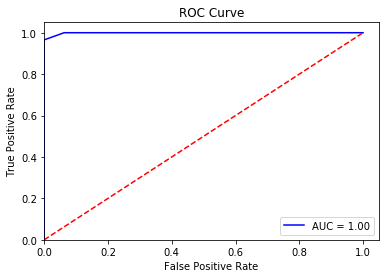

In [114]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_score_binary = neigh_binary.predict_proba(x_test_binary)[:, 1]

fpr, tpr, _ = roc_curve(y_test_binary, y_score_binary, pos_label = 1)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'blue', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
print("Area of the ROC curve: " + str(roc_auc))

Area of the ROC curve: 0.9989224137931034


Draw Precision-Recall curve

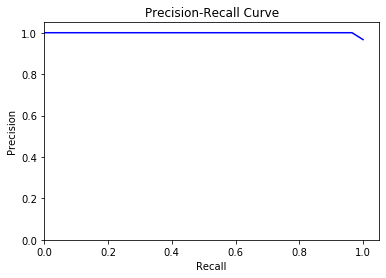

In [116]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_binary, y_score_binary, pos_label=1)

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall, precision, 'blue')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.show()
